# Setup

In [84]:
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import time
import reporting.app.log_analyzer.apache_log_analyzer as apache_log_analyzer
import reporting.app.log_analyzer.log_analyzer as log_analyzer

file_name = 'access_20190612.log'

# Draw

## API Statistics

<BarContainer object of 23 artists>

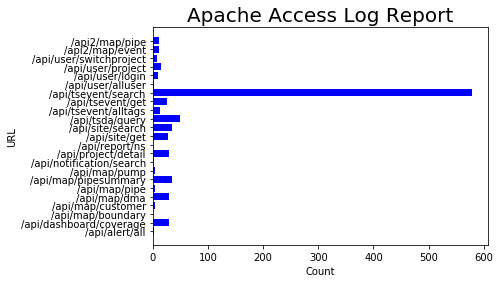

In [68]:
analyzer = apache_log_analyzer.APILogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

output = sorted(output.items(), key=lambda d: d[0])

fig=plt.figure()
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('URL')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')


## IP Statistics

<BarContainer object of 37 artists>

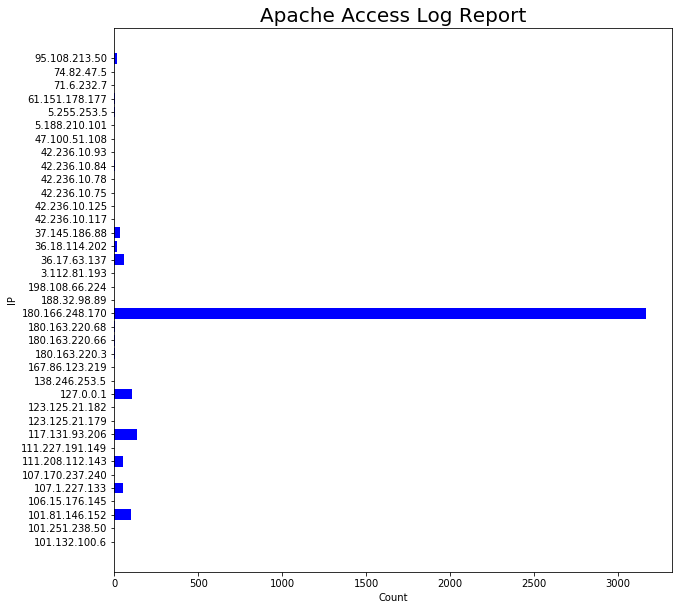

In [69]:
analyzer = log_analyzer.LogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

output = sorted(output.items(), key=lambda d: d[0])

fig=plt.figure(figsize=(10,10))
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('IP')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')


## Proxy Statistics

KeyError: 0

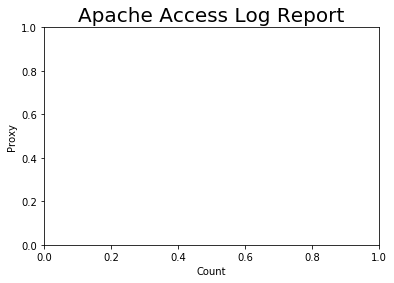

In [70]:
class ProxyLogAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            key = re.search(re.compile("(?<=\")[^\"]*(?=\")"), line).group(0)
            key = key.split(" ")[1]
            key = key.split("?")[0]
            if 'http' in key:
                # url_comps = key.split("/")
                # key = url_comps[0]+"/"+url_comps[1]+"/"+url_comps[2]+"/"+url_comps[3]
                pass
            else:
                raise Exception("not proxy url")
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = ProxyLogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

output = sorted(output.items(), key=lambda d: d[0])

fig=plt.figure()
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('Proxy')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')


## Date Time Statistics

[datetime.datetime(2019, 6, 11, 7, 0), datetime.datetime(2019, 6, 11, 8, 0), datetime.datetime(2019, 6, 11, 9, 0), datetime.datetime(2019, 6, 11, 10, 0), datetime.datetime(2019, 6, 11, 11, 0), datetime.datetime(2019, 6, 11, 12, 0), datetime.datetime(2019, 6, 11, 13, 0), datetime.datetime(2019, 6, 11, 14, 0), datetime.datetime(2019, 6, 11, 15, 0), datetime.datetime(2019, 6, 11, 16, 0), datetime.datetime(2019, 6, 11, 17, 0), datetime.datetime(2019, 6, 11, 18, 0), datetime.datetime(2019, 6, 11, 19, 0), datetime.datetime(2019, 6, 11, 20, 0), datetime.datetime(2019, 6, 11, 21, 0), datetime.datetime(2019, 6, 11, 22, 0), datetime.datetime(2019, 6, 11, 23, 0), datetime.datetime(2019, 6, 12, 0, 0), datetime.datetime(2019, 6, 12, 1, 0), datetime.datetime(2019, 6, 12, 2, 0), datetime.datetime(2019, 6, 12, 3, 0), datetime.datetime(2019, 6, 12, 4, 0)]
[22, 1479, 1172, 2, 69, 91, 194, 158, 170, 260, 7, 2, 17, 2, 52, 1, 3, 63, 3, 1, 5, 1]


<BarContainer object of 22 artists>

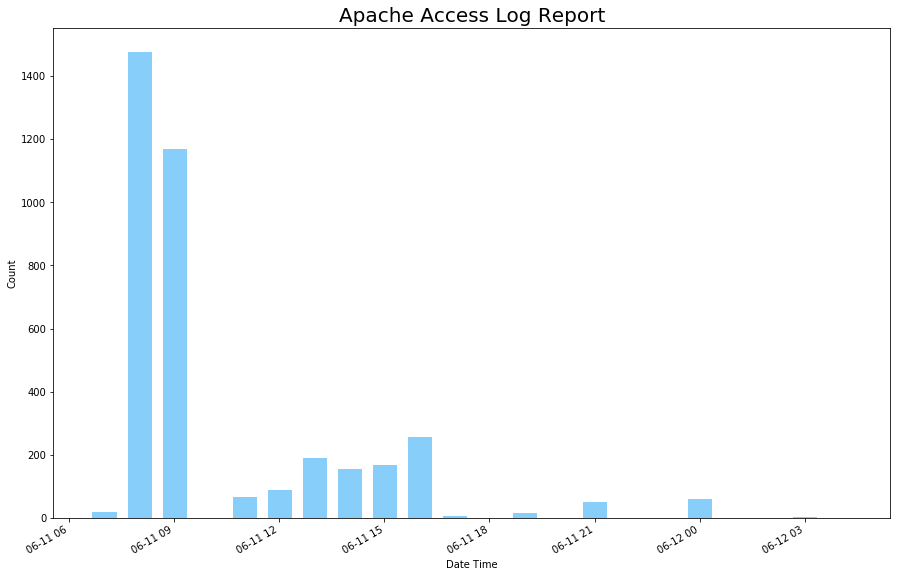

In [75]:
class DateTimeLogAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            dt = datetime.datetime.fromtimestamp(time.mktime(time.strptime(key, '%d/%b/%Y:%H:%M:%S'))).replace(minute=0, second=0)
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, dt)

analyzer = DateTimeLogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = []
valuelist = []

for k, v in output.items():
    timelist.append(k)
    valuelist.append(v)
    
print(timelist)
print(valuelist)

fig=plt.figure(figsize=(15,10))

subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Date Time')
subplt1.set_ylabel('Count')
fig.autofmt_xdate()

subplt1.bar(timelist, valuelist, width=0.03, facecolor = 'lightskyblue',edgecolor = 'white')

## Time Statistics

180.166.248.170 - - [11/Jun/2019:07:30:16 +0800] "GET /smartwater/#!/dashboard-info HTTP/1.1" 400 3351 "-" "-"

180.166.248.170 - - [11/Jun/2019:07:30:16 +0800] "GET /favicon.ico HTTP/1.1" 404 624 "-" "Mozilla/5.0 (Windows; U; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 2.0.50727; BIDUBrowser 8.7)"

180.166.248.170 - - [11/Jun/2019:07:36:17 +0800] "GET /optimize/ HTTP/1.1" 404 3939 "-" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36"

180.166.248.170 - - [11/Jun/2019:07:36:17 +0800] "GET /favicon.ico HTTP/1.1" 404 574 "https://smartwater.mathearth.com/optimize/" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36"

180.166.248.170 - - [11/Jun/2019:07:36:23 +0800] "GET /smartwater/assets/css/bootstrap.min.css HTTP/1.1" 200 24910 "https://smartwater.mathearth.com/smartwater/" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chr

180.166.248.170 - - [11/Jun/2019:08:44:21 +0800] "GET /smartwater/assets/js/canvasjs.min.js HTTP/1.1" 200 95843 "https://smartwater.mathearth.com/smartwater/" "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.221 Safari/537.36 SE 2.X MetaSr 1.0"

180.166.248.170 - - [11/Jun/2019:08:44:21 +0800] "GET /smartwater/app/js/services.js HTTP/1.1" 200 4539 "https://smartwater.mathearth.com/smartwater/" "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.221 Safari/537.36 SE 2.X MetaSr 1.0"

180.166.248.170 - - [11/Jun/2019:08:44:21 +0800] "GET /smartwater/app/modules/auth/authCtrl.js HTTP/1.1" 200 1168 "https://smartwater.mathearth.com/smartwater/" "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.221 Safari/537.36 SE 2.X MetaSr 1.0"

180.166.248.170 - - [11/Jun/2019:08:44:21 +0800] "GET /smartwater/app/js/factory.js HTTP/1.1" 200 1679 "https://smartwater.mathearth.

180.166.248.170 - - [11/Jun/2019:09:19:16 +0800] "GET /ux/canvasjs.min.js HTTP/1.1" 200 70860 "https://smartwater.mathearth.com/ux/angular/app/modules/scatter/scatter.html" "Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko"

180.166.248.170 - - [11/Jun/2019:09:19:16 +0800] "GET /ux/js/jquery-2.1.4.js HTTP/1.1" 200 81595 "https://smartwater.mathearth.com/ux/angular/app/modules/scatter/scatter.html" "Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko"

180.166.248.170 - - [11/Jun/2019:09:19:16 +0800] "GET /ux/js/jquery.canvasjs.min.js HTTP/1.1" 200 96683 "https://smartwater.mathearth.com/ux/angular/app/modules/scatter/scatter.html" "Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko"

180.166.248.170 - - [11/Jun/2019:09:19:17 +0800] "GET /favicon.ico HTTP/1.1" 404 3941 "-" "Mozilla/5.0 (Windows NT 10.0; Win64; x64; Trident/7.0; rv:11.0) like Gecko"

127.0.0.1 - - [11/Jun/2019:09:19:24 +0800] "OPTIONS * HTTP/1.0" 200 126 "-" "Apac

180.166.248.170 - - [11/Jun/2019:09:25:57 +0800] "GET /smartwater/app/modules/auth/login.html?token= HTTP/1.1" 200 1045 "https://smartwater.mathearth.com/smartwater/index.html" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36"

180.166.248.170 - - [11/Jun/2019:09:25:57 +0800] "GET /smartwater/assets/images/background/login-register.jpg HTTP/1.1" 200 57824 "https://smartwater.mathearth.com/smartwater/index.html" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36"

180.166.248.170 - - [11/Jun/2019:09:25:57 +0800] "GET /smartwater/assets/fonts/popreglatin.woff2 HTTP/1.1" 200 8365 "https://smartwater.mathearth.com/smartwater/assets/css/app.css" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36"

180.166.248.170 - - [11/Jun/2019:09:25:57 +0800] "GET /smartwater/assets/fonts/poplightlatin.woff2 HT

111.208.112.143 - - [11/Jun/2019:11:24:35 +0800] "GET /smartwater/assets/images/map/marker_customer.png HTTP/1.1" 200 2181 "https://smartwater.banxiniot.com/smartwater/" "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"

111.208.112.143 - - [11/Jun/2019:11:24:35 +0800] "GET /api/map/pipesummary?token=dd7fe634-d7b6-4d41-a1a7-02c1e7d22b21 HTTP/1.1" 200 894 "https://smartwater.banxiniot.com/smartwater/" "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"

111.208.112.143 - - [11/Jun/2019:11:24:35 +0800] "GET /smartwater/assets/images/map/marker_n.png HTTP/1.1" 200 2426 "https://smartwater.banxiniot.com/smartwater/" "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"

111.208.112.143 - - [11/Jun/2019:11:24:35 +0800] "GET /smartwater/assets/images/map/marker_pump.png HTTP/1.1" 200 3101 "https://smartwater.ban

180.166.248.170 - - [11/Jun/2019:15:43:20 +0800] "GET /api/tsevent/search/-1/86400000/?&&token=cd25d6cf-bac8-4673-aaaa-2fc4b5235225 HTTP/1.1" 200 757 "https://smartwater.mathearth.com/smartwater/index.html" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36"

180.166.248.170 - - [11/Jun/2019:15:43:50 +0800] "GET /api/tsevent/search/-1/86400000/?&&token=cd25d6cf-bac8-4673-aaaa-2fc4b5235225 HTTP/1.1" 200 578 "https://smartwater.mathearth.com/smartwater/index.html" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36"

180.166.248.170 - - [11/Jun/2019:15:44:20 +0800] "GET /api/tsevent/search/-1/86400000/?&&token=cd25d6cf-bac8-4673-aaaa-2fc4b5235225 HTTP/1.1" 200 578 "https://smartwater.mathearth.com/smartwater/index.html" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36"

180.166.248.170 - - [11/J

<BarContainer object of 22 artists>

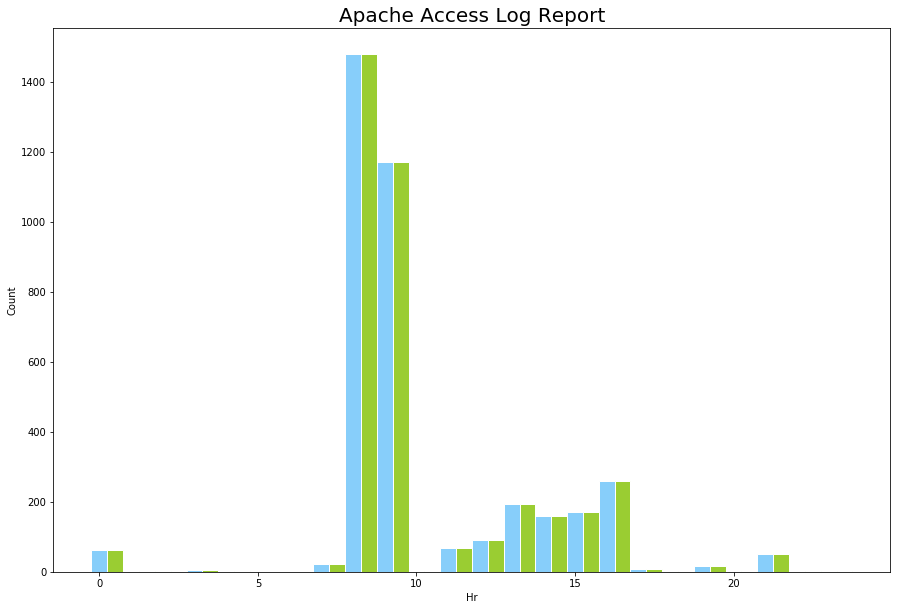

In [89]:
class HrLogAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            key = time.strptime(key, '%d/%b/%Y:%H:%M:%S').tm_hour
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = HrLogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = np.array([])
valuelist = np.array([])

for k, v in output.items():
    timelist = np.append(timelist, k)
    valuelist = np.append(valuelist, v)

fig=plt.figure(figsize=(15,10))

subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Hr')
subplt1.set_ylabel('Count')
# fig.autofmt_xdate()

subplt1.bar(timelist, valuelist, width=0.5, facecolor = 'lightskyblue',edgecolor = 'white')
# subplt1.bar(timelist+0.5, valuelist, width=0.5, facecolor = 'yellowgreen',edgecolor = 'white')


## Access Correlation

<BarContainer object of 12 artists>

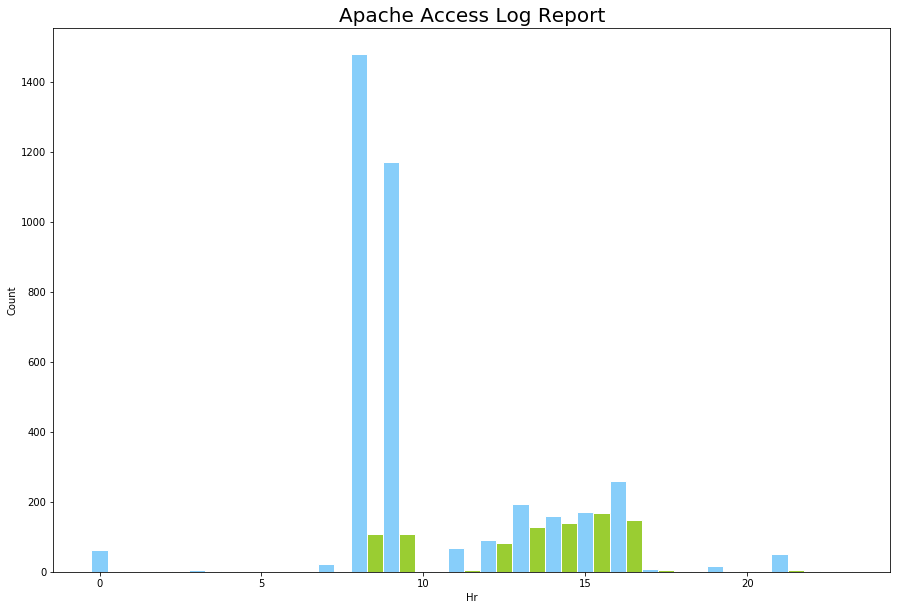

In [96]:
class AllLogAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            key = time.strptime(key, '%d/%b/%Y:%H:%M:%S').tm_hour
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = AllLogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = np.array([])
valuelist = np.array([])

for k, v in output.items():
    timelist = np.append(timelist, k)
    valuelist = np.append(valuelist, v)

fig=plt.figure(figsize=(15,10))

subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Hr')
subplt1.set_ylabel('Count')
# fig.autofmt_xdate()

subplt1.bar(timelist, valuelist, width=0.5, facecolor = 'lightskyblue',edgecolor = 'white')
# subplt1.bar(timelist+0.5, valuelist, width=0.5, facecolor = 'yellowgreen',edgecolor = 'white')


class APILogAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            if '/api/' in line:
                pass
            else:
                raise Exception('not this api')
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            key = time.strptime(key, '%d/%b/%Y:%H:%M:%S').tm_hour
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = APILogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = np.array([])
valuelist = np.array([])

for k, v in output.items():
    timelist = np.append(timelist, k)
    valuelist = np.append(valuelist, v)
    
subplt1.bar(timelist+0.5, valuelist, width=0.5, facecolor = 'yellowgreen',edgecolor = 'white')

## API Correlation

<BarContainer object of 8 artists>

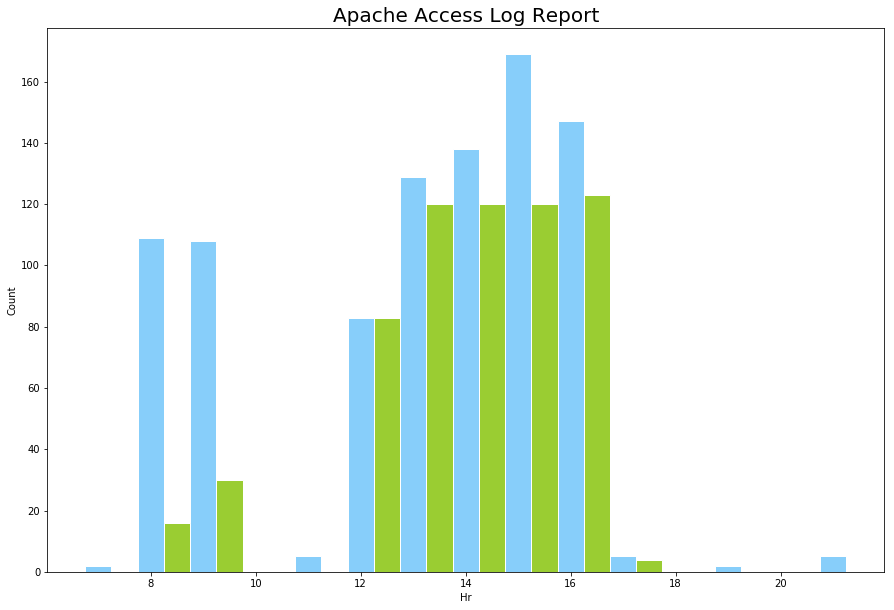

In [101]:
class AllAPIAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            if '/api/' in line:
                pass
            else:
                raise Exception('not this api')
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            key = time.strptime(key, '%d/%b/%Y:%H:%M:%S').tm_hour
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = AllAPIAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = np.array([])
valuelist = np.array([])

for k, v in output.items():
    timelist = np.append(timelist, k)
    valuelist = np.append(valuelist, v)

fig=plt.figure(figsize=(15,10))

subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Hr')
subplt1.set_ylabel('Count')
# fig.autofmt_xdate()

subplt1.bar(timelist, valuelist, width=0.5, facecolor = 'lightskyblue',edgecolor = 'white')
# subplt1.bar(timelist+0.5, valuelist, width=0.5, facecolor = 'yellowgreen',edgecolor = 'white')


class OneAPIAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            if '/api/tsevent/' in line:
                pass
            else:
                raise Exception('not this api')
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            key = time.strptime(key, '%d/%b/%Y:%H:%M:%S').tm_hour
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = OneAPIAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = np.array([])
valuelist = np.array([])

for k, v in output.items():
    timelist = np.append(timelist, k)
    valuelist = np.append(valuelist, v)
    
subplt1.bar(timelist+0.5, valuelist, width=0.5, facecolor = 'yellowgreen',edgecolor = 'white')